# Module 3 - Radioactive Decay

## Goals
Use recursive algorithms to solve the simple differential equation that governs radioactive decay over time.

## Radioactive Decay - continuous model

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Alpha_Decay.svg/500px-Alpha_Decay.svg.png" width=400px>

We want to analyze the radioactive decay of some sample where there are $N(t)$ atoms at some time $t$.  The continuous behavior of $N(t)$, as $N(t) \rightarrow \infty$ and $\Delta t \rightarrow 0$, is governed by the differential equation:

\begin{equation}
\frac{dN}{dt} = -\frac{N}{\tau}
\tag{1}
\end{equation}

where $\tau$ is the time constant of the decay (inverse of the decay rate, $\lambda$). The solution to this first order differential equation can be found by separation of variables and integration:

\begin{align}
\int_{N(0)}^{N(t)} \frac{dN}{N} &= - \int_0^t \frac{dt}{\tau} \\
\log\frac{N(t)}{N(0)} &= -\frac{t}{\tau} \\
N(t) &= N(0) \mathrm{e}^{-t/\tau}
\end{align}

### Further reading
* Chapter 1 - Giordano
* Chapter 4.5 - Landau (optional)
<!--
http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/CP04.html#4.5 (html notebook)
http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/CP04.ipynb (IPython notebook)
-->

### Plot $N(t)/N(0)$ vs. $t/\tau$

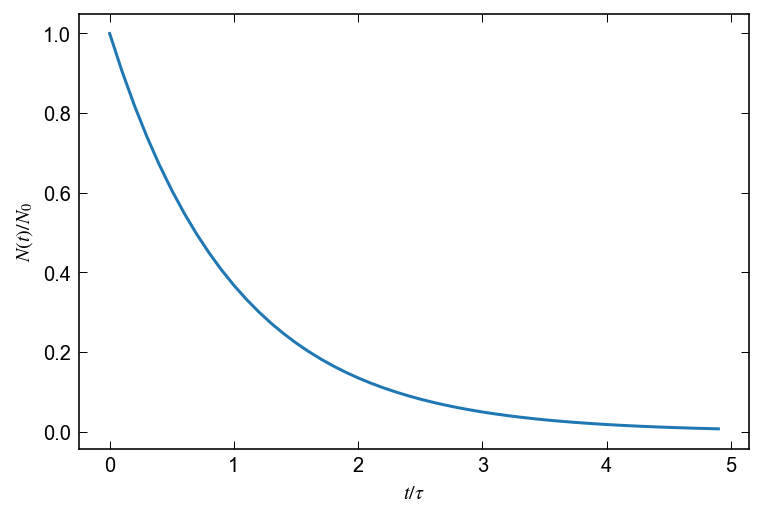

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

t = np.arange(0,5,0.1)
plt.plot(t,np.exp(-t))
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$t/\tau$')

### Fiestaware!!

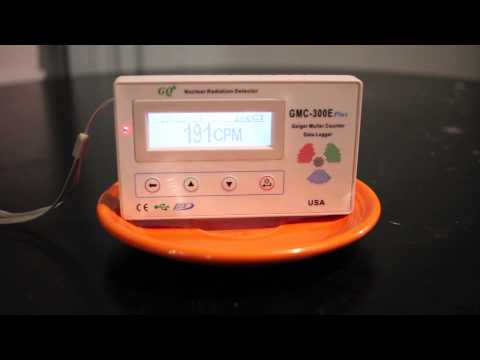

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('vTFviQbY6Vk', width=600, height=400)

## A Numerical Approach for the continuous decay model

### Question: How do we approximate the ODE on a discrete set of grid points?

### Taylor Expansions

\begin{equation}
f(t+\Delta t) = f(t) + \frac{df}{dt}\Delta t + \frac{1}{2} \frac{d^2 f}{dt^2} \Delta t^2 + \mathrm{O}\left(\Delta t^3\right)
\end{equation}

if $\Delta t \ll 1$ we can rearrange to get the discrete **forward derivative**:

\begin{equation}
\frac{df(t)}{dt} = \frac{f(t+\Delta t) - f(t)}{\Delta t} + \mathrm{O}\left(\Delta t^2\right) .
\end{equation}

### Application to the Radioactive Decay Problem

We have:
\begin{align}
\frac{dN(t)}{dt} & = -\frac{N}{\tau} \\
\Rightarrow \frac{N(t+\Delta t) - N(t)}{\Delta t} &\approx -\frac{N(t)}{\tau} \\
N(t+\Delta t) &\approx \left(1-\frac{\Delta t}{\tau}\right)N(t) + \mathrm{O}\left(\Delta t\right)
\end{align}
 

If we define an array $t/\tau = n \Delta t$ where $n \in \mathbb{Z}$ is an integer then this is a simple iterative initial value problem.  The **accuracy** of the numerical solution depends on the size of $\Delta t$.  This approach using the lowest order approximation to the derivitive is called the **Euler Method**.

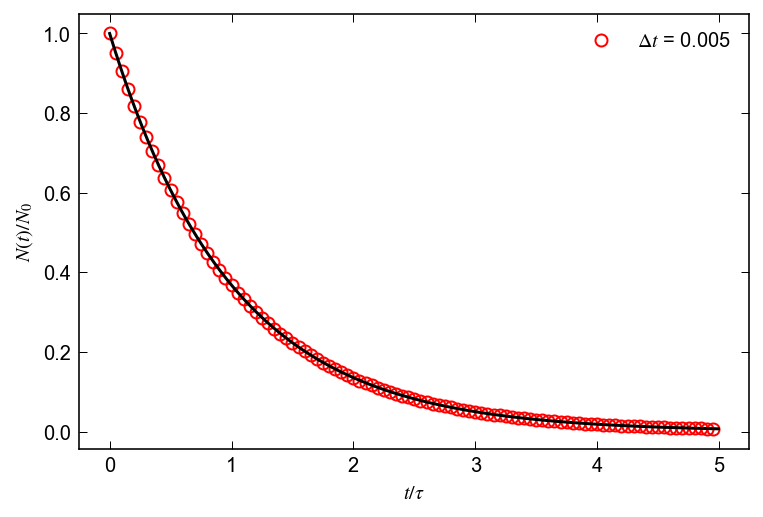

In [3]:
dt = 0.005
tmax = 5
t = np.arange(0, tmax, dt)
N = np.ones_like(t)
tau = 1.0
for n in range(len(N)-1):
    N[n+1] = (1 - dt/tau)*N[n]

plt.figure()
plt.plot(t[::10]/tau, N[::10]/N[0],'o',mfc='None',mec='red',label=r'$\Delta t$ = {0}'.format(dt))
plt.plot(t,np.exp(-t/tau),'k-')
plt.legend()
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$t/\tau$')
plt.show()

### How does this solution behave for large $\Delta t$?

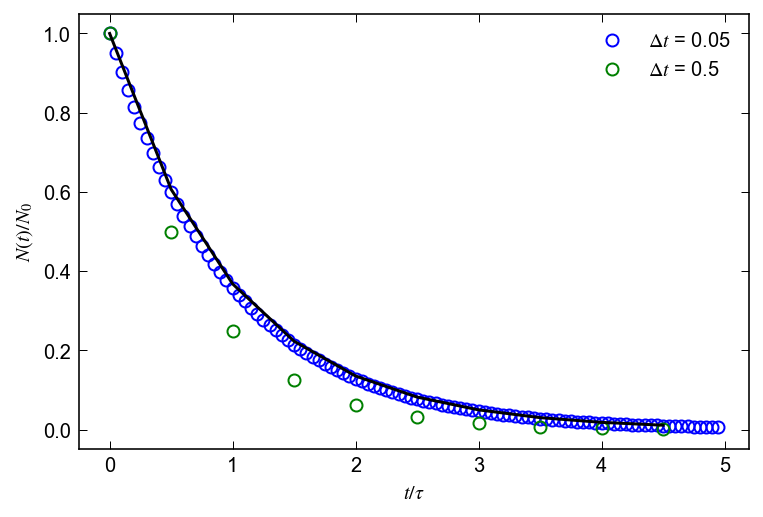

In [4]:
plt.figure()
tmax = 5
colors = ('b', 'g')                      # tuple with the list of colors to be used in the plot
i = 0
for dt in (0.05, 0.5):                   # iterate over tuple of time steps
    t = np.arange(0, tmax, dt)
    N = np.ones_like(t)
    for n in range(len(N)-1):
        N[n+1] = (1 - dt/tau)*N[n]
    plt.plot(t/tau, N/N[0],'o',mfc='None',mec=colors[i],label=r'$\Delta t$ = {0}'.format(dt))  
    # used the .format() method to include a numerical value in the string 
    i+=1
plt.plot(t,np.exp(-t/tau),'k-')
plt.legend()
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$t/\tau$')
plt.show()

## Radiactive decay - discrete model
While we previously approximated the spontaneous decay as a continuous process, radiactive decay is inherently discrete. For a system with $N(t)$ particles at a time $t$, the probability of observing a number of particles, $\Delta N(t)$, decay over a time period, $\Delta t$, is proportional to a constant decay rate, $\lambda = \frac{1}{\tau}$. 

\begin{equation}
    P(t + \Delta t) = \frac{\Delta N(t)}{N(t)} = -\lambda \Delta t \Rightarrow \frac{\Delta N(t)}{\Delta t} = -\frac{N(t)}{\tau}
\end{equation}



##  A Numerical Approach for the discrete decay model

### Question: How do we simulate probabilistic events?

The probability of observing an event must always be normalized: the sum of the probabilities of all possible outcomes must always come up to 1. We can use a uniformly distributed random number (between 0 and 1) to decide wether a decay event takes place given a known decay rate or time constant.


In [5]:
tmax = 5
dt = 0.005
lambda1 = 1.0                  # lambda is a protected python keyword, so we cannot use it as a variable in our code
t = np.arange(0, tmax, dt)     # array of discrete times
N = np.ones_like(t, dtype=np.int64)           # array of number of particles at a given time
N[0] = 10000                   # Initial number of particles

for i in range(len(t)-1):      # iterate over all discrete time steps
    nDecay = 0
    for n in range(N[i]):      # iterate over all the un-decayed particles at a given time
        R = np.random.random() # attempt for a single decay event
        if (R < lambda1*dt):   # if attempt is lower than P(t) = lambda*dt, then particle decays
            nDecay +=1
    N[i+1] = N[i] - nDecay

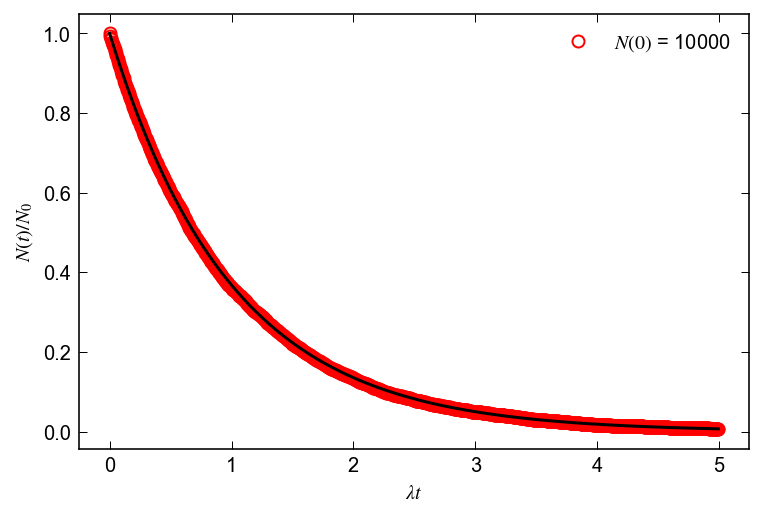

In [6]:
plt.figure()
plt.plot(t*lambda1, N/N[0],'o',mfc='None',mec='red',label=r'$N(0)$ = {0}'.format(N[0]))
plt.plot(t,np.exp(-lambda1*t),'k-')
plt.legend()
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$\lambda t$')
plt.show()

### What happens for lower numbers of particles?

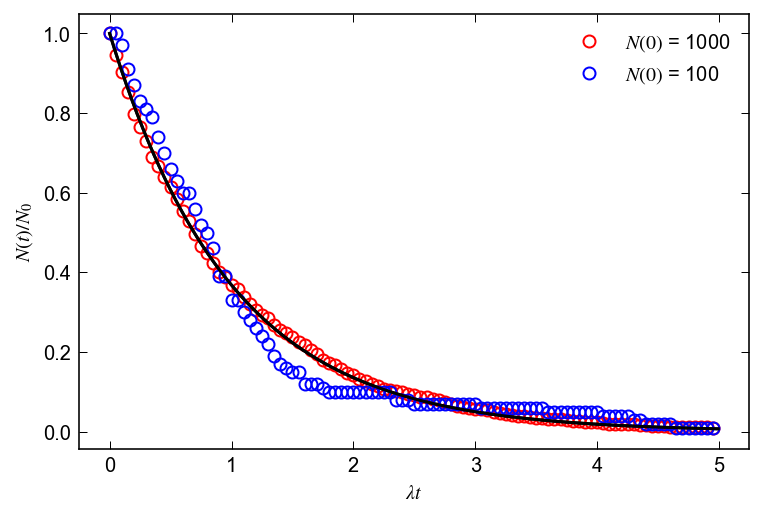

In [7]:
tmax = 5
dt = 0.005
lambda1 = 1.0
plt.figure()
colors = ('r', 'b', 'g')

c = 0
for N0 in (1000, 100):
    t = np.arange(0, tmax, dt)
    N = np.ones_like(t, dtype=np.int64)
    N[0] = N0                   # Initial number of particles
    for i in range(len(t)-1):      # iterate over all discrete time steps
        nDecay = 0
        for n in range(N[i]):      # iterate over all the un-decayed particles at a given time
            R = np.random.random() # attempt for a single decay event
            if (R < lambda1*dt):   # if attempt is lower than P(t) = lambda*dt, then particle decays
                nDecay +=1
        N[i+1] = N[i] - nDecay
    
    plt.plot(t[::10]*lambda1, N[::10]/N[0],'o',mfc='None',mec=colors[c],label=r'$N(0)$ = {0}'.format(N[0]))
    plt.plot(t,np.exp(-lambda1*t),'k-')
    c+=1

plt.legend()
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$\lambda t$')
plt.show()

You can use radiactive decay to generate true random numbers!!